In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import datetime

In [2]:
start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2019, 12, 31)

symbol=['TSM','MSFT','AAPL','INTC','ORCL','NVDA','IBM']



# Экспорт с Yahoo
data_exchange={}
for s in symbol:
    data_exchange[s] =  web.DataReader(s,'yahoo', start, end) 
data_exchange

# Экспорт с Google
#data_exchange={}
#for s in symbol:
#    data_exchange[s] =  web.DataReader(s,'google',start,end) 
#data_exchange


{'TSM':                  High        Low       Open      Close      Volume  Adj Close
 Date                                                                         
 2019-01-02  36.750000  36.000000  36.200001  36.520000   5273100.0  34.111073
 2019-01-03  35.520000  34.270000  35.340000  34.360001  15998000.0  32.093552
 2019-01-04  35.029999  34.209999  34.459999  34.970001  14178200.0  32.663319
 2019-01-07  35.470001  34.970001  35.009998  35.230000   6850800.0  32.906162
 2019-01-08  35.180000  34.639999  35.110001  34.939999  11462600.0  32.635288
 ...               ...        ...        ...        ...         ...        ...
 2019-12-24  58.090000  57.549999  57.990002  57.759998   2692200.0  56.497253
 2019-12-26  58.349998  57.759998  57.799999  58.250000   2490400.0  56.976543
 2019-12-27  58.709999  58.330002  58.529999  58.459999   2847800.0  57.181953
 2019-12-30  58.689999  57.619999  58.660000  57.849998   3519900.0  56.585289
 2019-12-31  58.130001  57.459999  57.680000 

In [3]:
data_exchange['TSM'].head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,36.750000,36.000000,36.200001,36.520000,5273100.0,34.111073
2019-01-03,35.520000,34.270000,35.340000,34.360001,15998000.0,32.093552
2019-01-04,35.029999,34.209999,34.459999,34.970001,14178200.0,32.663319
2019-01-07,35.470001,34.970001,35.009998,35.230000,6850800.0,32.906162
2019-01-08,35.180000,34.639999,35.110001,34.939999,11462600.0,32.635288


In [4]:
def pivot_tikers(dict_df,col):
    item=[]
    tikers=[]
    for tiker in data_exchange.keys():
        data=dict_df[tiker][col]
        item.append(data)
        tikers.append(tiker)
    combine=pd.concat(item, axis=1) 
    combine.columns=tikers
    return combine
    

In [5]:
stoks_open=pivot_tikers(data_exchange,'Open')
stoks_open.head(5)

,TSM,MSFT,AAPL,INTC,ORCL,NVDA,IBM
Date,,,,,,,
2019-01-02,36.200001,99.550003,38.722500,45.959999,44.480000,130.639999,112.010002
2019-01-03,35.340000,100.099998,35.994999,46.150002,44.750000,133.789993,114.529999
2019-01-04,34.459999,99.720001,36.132500,45.840000,45.369999,130.940002,114.910004
2019-01-07,35.009998,101.639999,37.174999,47.099998,46.930000,138.500000,117.500000
2019-01-08,35.110001,103.040001,37.389999,47.799999,47.930000,146.690002,119.660004


In [6]:
stoks_close=pivot_tikers(data_exchange,'Close')
stoks_close.head(5)

,TSM,MSFT,AAPL,INTC,ORCL,NVDA,IBM
Date,,,,,,,
2019-01-02,36.520000,101.120003,39.480000,47.080002,45.220001,136.220001,115.209999
2019-01-03,34.360001,97.400002,35.547501,44.490002,44.779999,127.989998,112.910004
2019-01-04,34.970001,101.930000,37.064999,47.220001,46.709999,136.190002,117.320000
2019-01-07,35.230000,102.059998,36.982498,47.439999,47.450001,143.399994,118.150002
2019-01-08,34.939999,102.800003,37.687500,47.740002,47.880001,139.830002,119.830002


In [7]:
stoks_volume=pivot_tikers(data_exchange,'Volume')
stoks_volume.head(5)

,TSM,MSFT,AAPL,INTC,ORCL,NVDA,IBM
Date,,,,,,,
2019-01-02,5273100.0,35329300.0,148158800.0,18774600.0,14320400.0,12718800.0,4239900.0
2019-01-03,15998000.0,42579100.0,365248800.0,32267300.0,19868700.0,17638800.0,4346700.0
2019-01-04,14178200.0,44060600.0,234428400.0,35447300.0,20984000.0,14640500.0,4477800.0
2019-01-07,6850800.0,35656100.0,219111200.0,22736800.0,17967900.0,17729000.0,3751200.0
2019-01-08,11462600.0,31514400.0,164101200.0,22749200.0,16255700.0,19650400.0,4763600.0


<AxesSubplot:xlabel='Date'>

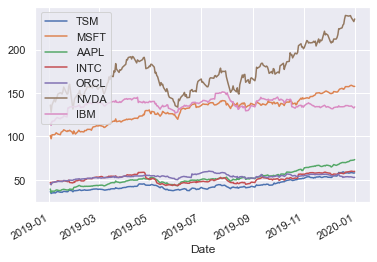

In [8]:
sns.set()
stoks_close.plot()

<AxesSubplot:xlabel='Date'>

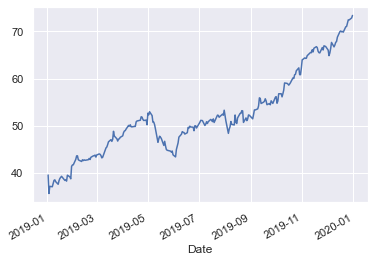

In [9]:
stoks_close['AAPL'].plot()

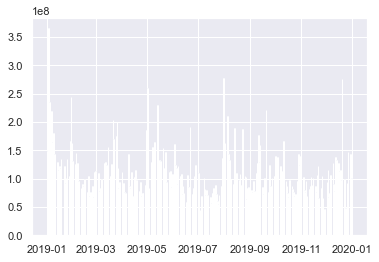

In [10]:
plt.bar(stoks_volume['AAPL'].index,stoks_volume['AAPL'].values);

In [11]:
# Здесь разбираемся сами и совмещаем два графика



### Вычисляем ежедневное процентное закрытие
$$ r_t =\dfrac{p_t}{p_{t-1}}-1 $$

In [12]:
daily_pct_na=(stoks_close/stoks_close.shift(1)-1)
daily_pct_na.head()

,TSM,MSFT,AAPL,INTC,ORCL,NVDA,IBM
Date,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.059146,-0.036788,-0.099607,-0.055013,-0.009730,-0.060417,-0.019964
2019-01-04,0.017753,0.046509,0.042689,0.061362,0.043100,0.064068,0.039058
2019-01-07,0.007435,0.001275,-0.002226,0.004659,0.015842,0.052941,0.007075
2019-01-08,-0.008232,0.007251,0.019063,0.006324,0.009062,-0.024895,0.014219


In [13]:
#тут внимательнее с данными
daily_pct_0=(stoks_close/stoks_close.shift(1)-1).fillna(0)
daily_pct_0.head()

,TSM,MSFT,AAPL,INTC,ORCL,NVDA,IBM
Date,,,,,,,
2019-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-01-03,-0.059146,-0.036788,-0.099607,-0.055013,-0.009730,-0.060417,-0.019964
2019-01-04,0.017753,0.046509,0.042689,0.061362,0.043100,0.064068,0.039058
2019-01-07,0.007435,0.001275,-0.002226,0.004659,0.015842,0.052941,0.007075
2019-01-08,-0.008232,0.007251,0.019063,0.006324,0.009062,-0.024895,0.014219


### Вычисляем кумулятивную процентную доходность
$$ i_0=r_0=0 $$
$$ i_t=(i_{t-1}+r_t)100 $$

In [14]:
daily_sum_na=(daily_pct_na*100).cumsum()
daily_sum_na.head(5)

,TSM,MSFT,AAPL,INTC,ORCL,NVDA,IBM
Date,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,-5.914567,-3.678799,-9.960737,-5.501275,-0.973026,-6.041700,-1.996351
2019-01-04,-4.139245,0.972124,-5.691807,0.634935,3.336934,0.365055,1.909411
2019-01-07,-3.395755,1.099660,-5.914390,1.100833,4.921181,5.659123,2.616880
2019-01-08,-4.218920,1.824729,-4.008078,1.733218,5.827399,3.169588,4.038801


In [15]:
daily_sum_0=(daily_pct_0*100).cumsum()
daily_sum_0.head(5)

,TSM,MSFT,AAPL,INTC,ORCL,NVDA,IBM
Date,,,,,,,
2019-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-01-03,-5.914567,-3.678799,-9.960737,-5.501275,-0.973026,-6.041700,-1.996351
2019-01-04,-4.139245,0.972124,-5.691807,0.634935,3.336934,0.365055,1.909411
2019-01-07,-3.395755,1.099660,-5.914390,1.100833,4.921181,5.659123,2.616880
2019-01-08,-4.218920,1.824729,-4.008078,1.733218,5.827399,3.169588,4.038801


<AxesSubplot:xlabel='Date'>

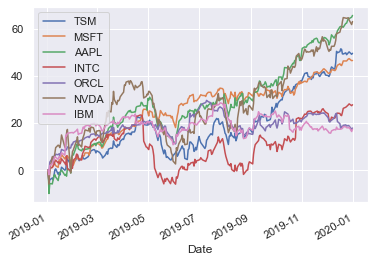

In [16]:
daily_sum_0.plot()

### Вычисляем накопленную процентную доходность
$$ i_0 = 1 $$
$$ i_t = (1+r_t) i_{t-1} $$

In [17]:
daily_prod_na=(1+daily_pct_na).cumprod()
daily_prod_na.head(5)

,TSM,MSFT,AAPL,INTC,ORCL,NVDA,IBM
Date,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,0.940854,0.963212,0.900393,0.944987,0.990270,0.939583,0.980036
2019-01-04,0.957558,1.008010,0.938830,1.002974,1.032950,0.999780,1.018314
2019-01-07,0.964677,1.009296,0.936740,1.007646,1.049314,1.052709,1.025519
2019-01-08,0.956736,1.016614,0.954597,1.014019,1.058824,1.026501,1.040101


In [18]:
daily_prod_0=(1+daily_pct_0).cumprod()
daily_prod_0.head(5)

,TSM,MSFT,AAPL,INTC,ORCL,NVDA,IBM
Date,,,,,,,
2019-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2019-01-03,0.940854,0.963212,0.900393,0.944987,0.990270,0.939583,0.980036
2019-01-04,0.957558,1.008010,0.938830,1.002974,1.032950,0.999780,1.018314
2019-01-07,0.964677,1.009296,0.936740,1.007646,1.049314,1.052709,1.025519
2019-01-08,0.956736,1.016614,0.954597,1.014019,1.058824,1.026501,1.040101


<AxesSubplot:xlabel='Date'>

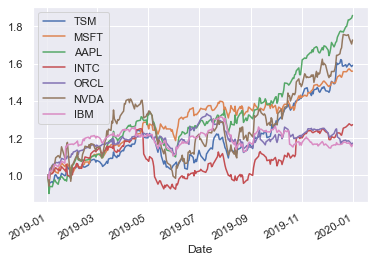

In [19]:
daily_prod_0.plot()

In [20]:
daily_prod_0.asfreq(freq='M')

,TSM,MSFT,AAPL,INTC,ORCL,NVDA,IBM
Date,,,,,,,
2019-01-31,1.030120,1.032733,1.053951,1.000850,1.110792,1.055278,1.166739
2019-02-28,1.069277,1.107892,1.096441,1.124894,1.152808,1.132433,1.198941
2019-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-30,1.199890,1.291535,1.270707,1.084112,1.223574,1.328733,1.217516
2019-05-31,1.050109,1.223101,1.108599,0.935429,1.118974,0.994421,1.102248
2019-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-31,1.167306,1.347607,1.349037,1.073704,1.245024,1.238585,1.286694
2019-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-30,1.272727,1.374901,1.418250,1.094520,1.216939,1.277859,1.262217


In [21]:
month_sum_q=daily_sum_0.asfreq(freq='BM')
month_sum_q

,TSM,MSFT,AAPL,INTC,ORCL,NVDA,IBM
Date,,,,,,,
2019-01-31,3.451918,3.611137,6.274805,0.738772,10.667958,7.758335,15.906611
2019-02-28,7.264543,10.769691,10.325292,12.593667,14.435245,15.102450,18.700856
2019-03-29,12.179764,16.036175,19.800617,14.123825,17.557323,31.052903,20.896259
2019-04-30,19.068584,26.326802,25.380622,9.629893,20.566151,32.165787,20.449403
2019-05-31,6.097055,21.093001,12.252691,-4.691158,11.771112,3.791807,10.695205
2019-06-28,8.552848,29.320321,24.739266,3.871402,24.073670,23.754712,19.044680
2019-07-31,17.405626,31.125153,32.239167,9.521396,22.982502,26.814121,26.421516
2019-08-30,17.782786,32.626844,30.778203,3.475607,15.431101,27.358935,17.835661
2019-09-30,26.713319,33.586526,38.005223,12.051136,21.228864,31.671850,25.011283


<AxesSubplot:xlabel='Date'>

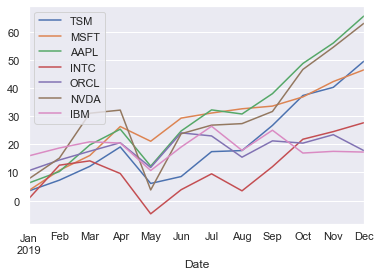

In [22]:
month_sum_q.plot()

In [23]:
# ВНИМАНИЕ не ОШИБИСЬ С ОПЕРАТОРОМ почему тут стоит first, а не sum, last или prod
# Что значит "MS" 
# ВНИМАНИЕ почему такой код лучше предидушего?

month_sum=daily_sum_0.resample('MS').first()
month_sum

,TSM,MSFT,AAPL,INTC,ORCL,NVDA,IBM
Date,,,,,,,
2019-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-02-01,3.319012,2.031130,6.322872,4.155581,11.822650,8.440071,15.668557
2019-03-01,8.135222,11.216000,11.376409,13.235661,15.164187,16.522133,19.475483
2019-04-01,13.180740,16.951890,20.479748,15.632200,19.177138,32.567717,22.455435
2019-05-01,19.068584,24.244100,30.289181,9.081299,19.752848,31.872970,20.656143
2019-06-01,7.322612,17.988211,11.241665,-6.008147,11.059656,2.551583,11.703164
2019-07-01,14.194929,30.604276,26.573343,4.247421,25.899187,24.935984,20.480511
2019-08-01,15.622839,32.438717,30.075254,7.444246,22.236502,24.561867,27.824648
2019-09-01,15.648139,31.306659,29.321842,2.568625,15.104551,25.365027,16.780550


<AxesSubplot:xlabel='Date'>

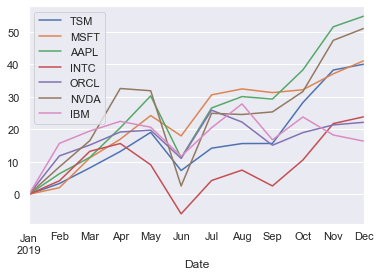

In [24]:
month_sum.plot()

In [25]:
month_prod=daily_prod_0.resample('MS').first()
month_prod

,TSM,MSFT,AAPL,INTC,ORCL,NVDA,IBM
Date,,,,,,,
2019-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2019-02-01,1.028751,1.016416,1.054458,1.035047,1.123618,1.062472,1.163962
2019-03-01,1.078587,1.112836,1.107966,1.132115,1.161212,1.148510,1.208228
2019-04-01,1.132804,1.177017,1.210993,1.157816,1.206988,1.338129,1.243816
2019-05-01,1.199890,1.264636,1.333080,1.078165,1.213622,1.324842,1.220033
2019-06-01,1.062979,1.185127,1.097391,0.923110,1.111013,0.982088,1.113358
2019-07-01,1.133078,1.341772,1.276279,1.020603,1.282839,1.219865,1.214131
2019-08-01,1.146495,1.365308,1.319845,1.051402,1.235736,1.210689,1.304748
2019-09-01,1.142388,1.345332,1.302558,0.997876,1.147501,1.205183,1.163962


<AxesSubplot:xlabel='Date'>

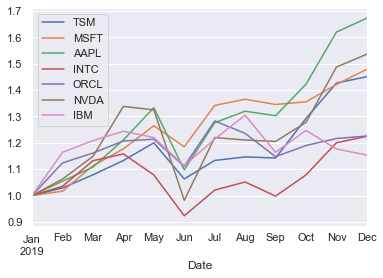

In [26]:
month_prod.plot()

### Скользящее среднее

<AxesSubplot:xlabel='Date'>

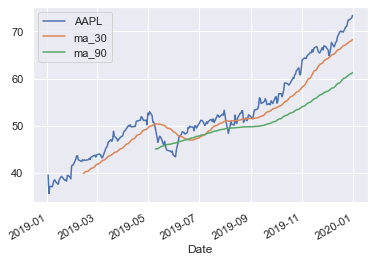

In [27]:
aapl_close=stoks_close['AAPL']
ma_30=aapl_close.rolling(30).mean()
ma_90=aapl_close.rolling(90).mean()
result=pd.concat([aapl_close,ma_30,ma_90],axis=1)
result.columns=['AAPL','ma_30','ma_90']
result.plot()

In [28]:
aapl_close=daily_sum_0['AAPL']
msft_close=daily_sum_0['MSFT']

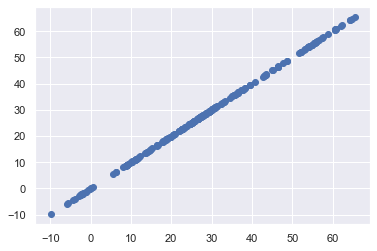

In [29]:
plt.scatter(aapl_close,aapl_close)

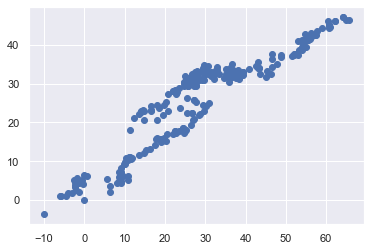

In [30]:
plt.scatter(aapl_close,msft_close)

<AxesSubplot:xlabel='AAPL', ylabel='MSFT'>

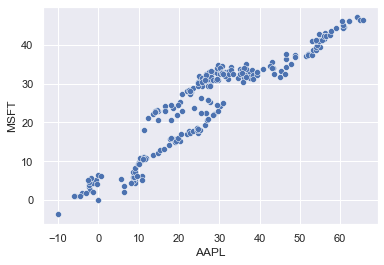

In [31]:
df=pd.concat([aapl_close,msft_close],axis=1)
sns.scatterplot(x="AAPL", y="MSFT",data=df)

/Users/imachome/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AAPL', ylabel='MSFT'>

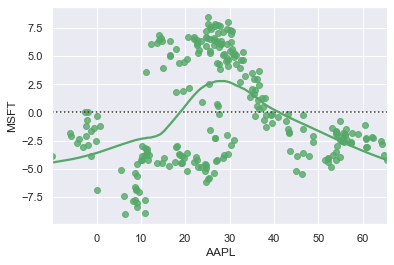

In [32]:
sns.residplot(aapl_close, msft_close, lowess=True, color="g")

/Users/imachome/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


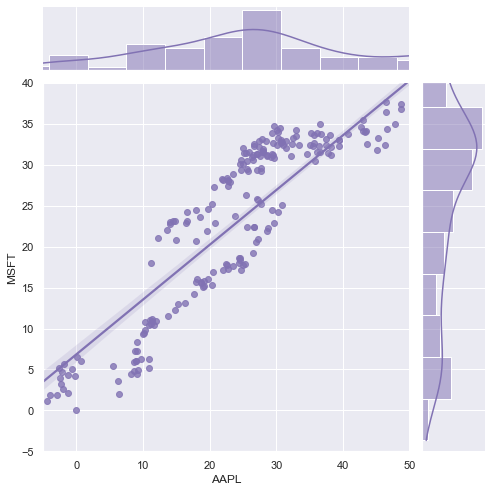

In [33]:
sns.jointplot("AAPL", "MSFT", data=df, kind="reg", xlim=(-5,50), ylim=(-5,40), color="m", height=7)

### Волатильность

<AxesSubplot:xlabel='Date'>

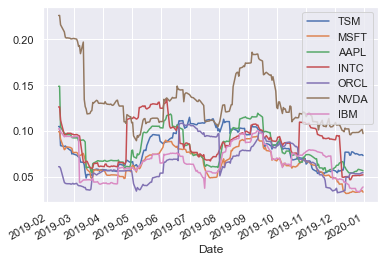

In [34]:
per=30

vol=daily_pct_0.rolling(per).std()*np.sqrt(per)
vol.plot()

### Оценикм риск

In [35]:
df_risk=pd.concat([daily_pct_0.mean(),daily_pct_0.std()],axis=1)
df_risk.columns=["mean",'std']
df_risk

,mean,std
TSM,0.001964,0.015524
MSFT,0.001843,0.012525
AAPL,0.002601,0.016493
INTC,0.001098,0.017041
ORCL,0.000706,0.012479
NVDA,0.002499,0.025558
IBM,0.000685,0.012984


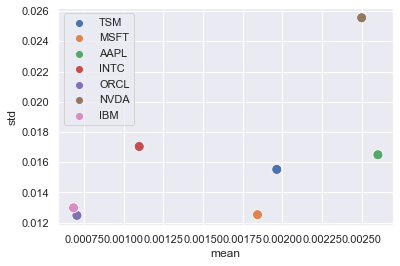

In [36]:
sns.scatterplot(x="mean", y="std", hue=df_risk.index, s=100 ,data=df_risk);

### Взаимная корреляция

напомним про клику и диверсификацию портфеля

In [37]:
corr=daily_pct_0.corr()
corr

,TSM,MSFT,AAPL,INTC,ORCL,NVDA,IBM
TSM,1.000000,0.489067,0.608970,0.538977,0.425367,0.602382,0.452713
MSFT,0.489067,1.000000,0.620708,0.516339,0.547162,0.566831,0.525111
AAPL,0.608970,0.620708,1.000000,0.552987,0.445488,0.585560,0.453501
INTC,0.538977,0.516339,0.552987,1.000000,0.424488,0.623493,0.421180
ORCL,0.425367,0.547162,0.445488,0.424488,1.000000,0.455231,0.547775
NVDA,0.602382,0.566831,0.585560,0.623493,0.455231,1.000000,0.487983
IBM,0.452713,0.525111,0.453501,0.421180,0.547775,0.487983,1.000000


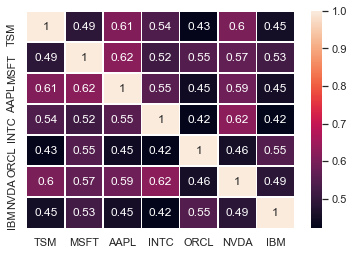

In [38]:
sns.heatmap(corr, annot=True, linewidths=.5);